In [67]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
df.shape

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [69]:
y = df.pop('target')

In [70]:
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')  # Convert non-numeric values to NaN
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')  # Convert non-numeric values to NaN

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=42)

In [72]:
print('X train:', X_train.shape)
print('X test:', X_test.shape)
print('Y train:', y_train.shape)
print('Y test:', y_test.shape)

X train: (181, 13)
X test: (122, 13)
Y train: (181,)
Y test: (122,)


In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
acc = []
k_values = list(range(1, 170)) #the data had 180 rows, so wasn't able to perform 250 runs

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print(f'Accuracy of kNN on Heart dataset: {accuracy:.2f}')




Accuracy of kNN on Heart dataset: 0.76
Accuracy of kNN on Heart dataset: 0.71
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.79
Accuracy of kNN on Heart dataset: 0.87
Accuracy of kNN on Heart dataset: 0.82
Accuracy of kNN on Heart dataset: 0.85
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.87
Accuracy of kNN on Heart dataset: 0.81


Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.82
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.82
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.82
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.83
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart dataset: 0.84
Accuracy of kNN on Heart 

In [75]:

max_accuracy = max(acc)
min_accuracy = min(acc)
print(f'Max accuracy{max_accuracy}\nMin accuracy {min_accuracy}')


Max accuracy0.8688524590163934
Min accuracy 0.6885245901639344


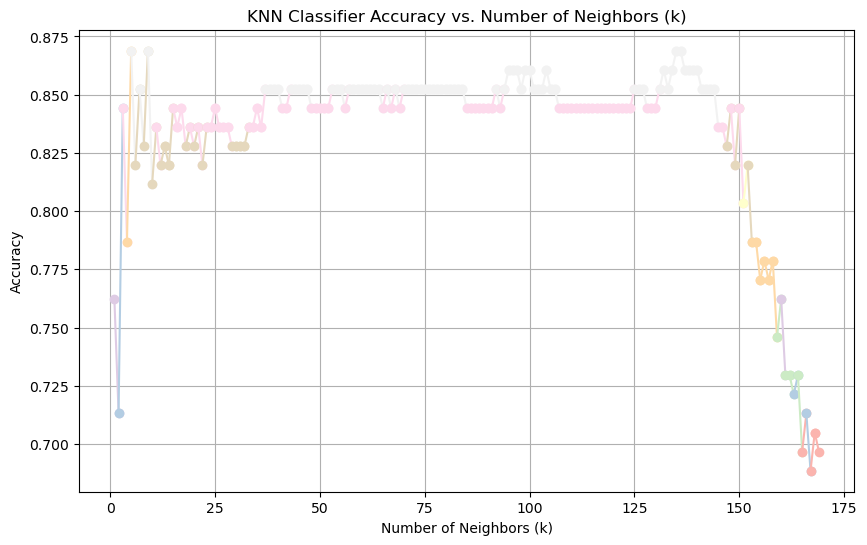

In [77]:
from matplotlib import cm
from matplotlib.colors import Normalize

norm = Normalize(vmin=min(acc), vmax=max(acc))
cmap = cm.Pastel1  # You can change this to any other pastel colormap (e.g., 'Pastel2')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot with a pastel colormap applied to the line
for i in range(len(k_values)-1):
    plt.plot(k_values[i:i+2], acc[i:i+2], marker='o', linestyle='-', color=cmap(norm(acc[i])))

# Add titles and labels
plt.title('KNN Classifier Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)